In [ ]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset --force

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 6.88MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool

In [9]:
df = pd.read_csv('/content/heart.csv')
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
#convert  int64 columns to int16 / float16
for column in df.select_dtypes(include=['int64']).columns:
    df[column] = df[column].astype('int16')
for column in df.select_dtypes(include=['float32']).columns:
    df[column] = df[column].astype('float16')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int16  
 1   sex       303 non-null    int16  
 2   cp        303 non-null    int16  
 3   trtbps    303 non-null    int16  
 4   chol      303 non-null    int16  
 5   fbs       303 non-null    int16  
 6   restecg   303 non-null    int16  
 7   thalachh  303 non-null    int16  
 8   exng      303 non-null    int16  
 9   oldpeak   303 non-null    float16
 10  slp       303 non-null    int16  
 11  caa       303 non-null    int16  
 12  thall     303 non-null    int16  
 13  output    303 non-null    int16  
dtypes: float16(1), int16(13)
memory usage: 8.4 KB


In [16]:
pd.concat((df.nunique(), df.dtypes), axis=1)

,0,1
age,41,int16
sex,2,int16
cp,4,int16
trtbps,49,int16
chol,152,int16
fbs,2,int16
restecg,3,int16
thalachh,91,int16
exng,2,int16
oldpeak,40,float16


In [18]:
df.isnull().sum().sum()

0

In [21]:
pd.concat((df.nunique(), df.dtypes), axis=1)

,0,1
age,41,int16
sex,2,int16
cp,4,int16
trtbps,49,int16
chol,152,int16
fbs,2,int16
restecg,3,int16
thalachh,91,int16
exng,2,int16
oldpeak,40,float16


In [22]:
df.isnull().sum().sum()

0

In [23]:
df.duplicated().sum()

1

In [26]:

df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300781,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400391,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.799805,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600098,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.199951,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200195,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400391,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200195,1,1,3,0


In [27]:
# find missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [32]:
fig = px.line(age_count, x=age_count.index, y=age_count.values, markers=True)
fig.update_layout(title="age distribution", xaxis_title="age", yaxis_title="Freq")
fig.update_traces(
    hoverinfo='all',
    hovertemplate='<b>age: </b>%{x} <br><i>frequency: </i>%{y}'
)
fig.show()

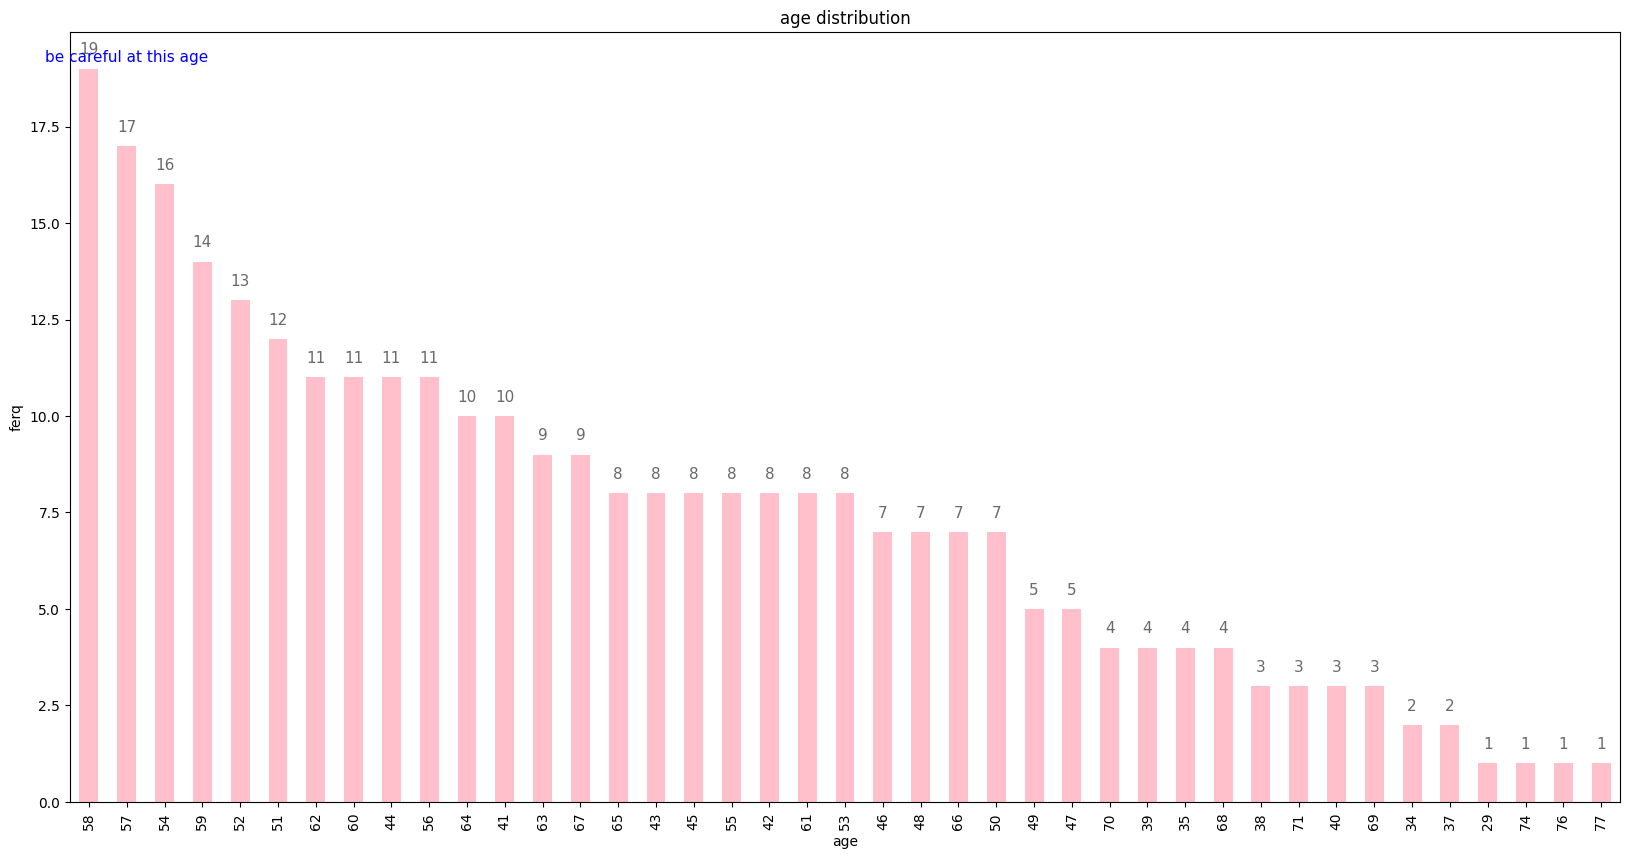

In [40]:
plt.figure(figsize=(20, 10))

age_count = df['age'].value_counts()

ax = age_count.plot(kind='bar', color='pink')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('ferq')
for idx, i in enumerate(ax.patches):
  #add text
    ax.text(
        i.get_x() + i.get_width() / 2.,
        i.get_height() + 0.3,
        str(i.get_height()),
        fontsize=11,
        color='dimgrey',
        ha='center',
        va='bottom',
    )
    if idx == 1:
        ax.text(
            i.get_x() + i.get_width() / 2.,
            i.get_height() + 2.5,
            'be careful at this age',
            fontsize=11,
            color='blue',
            ha='center',
           va='top',

        )


plt.show()

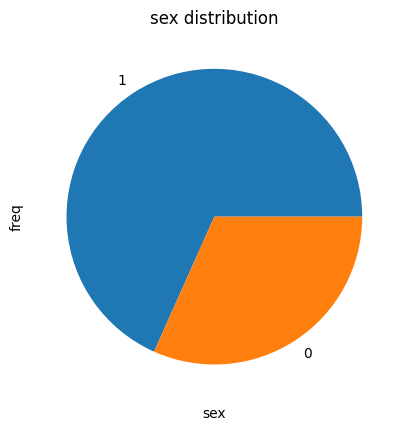

In [41]:
#pie

mission_status_count = df['sex'].value_counts()
mission_status_count.plot(kind='pie')
plt.title("sex distribution")
plt.xlabel("sex")
plt.ylabel("freq")
plt.show()

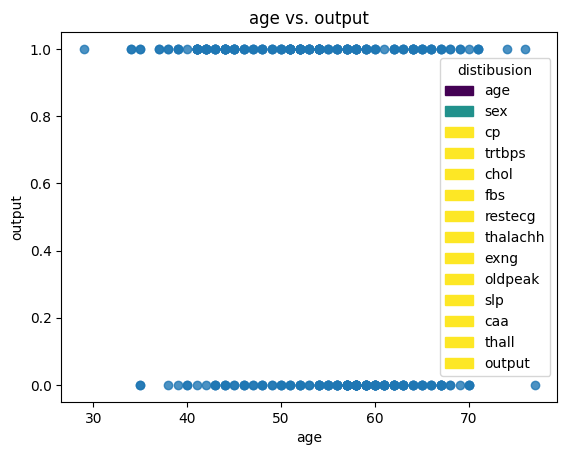

In [45]:
plt.scatter(df['age'], df['output'], alpha=0.8)
plt.title('age vs. output')
plt.xlabel('age')
plt.ylabel('output')

# Create custom legend
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color=plt.cm.viridis(i / 2), label=name) for i, name in enumerate(df)]
plt.legend(handles=legend_labels, title="distibusion")

plt.show()

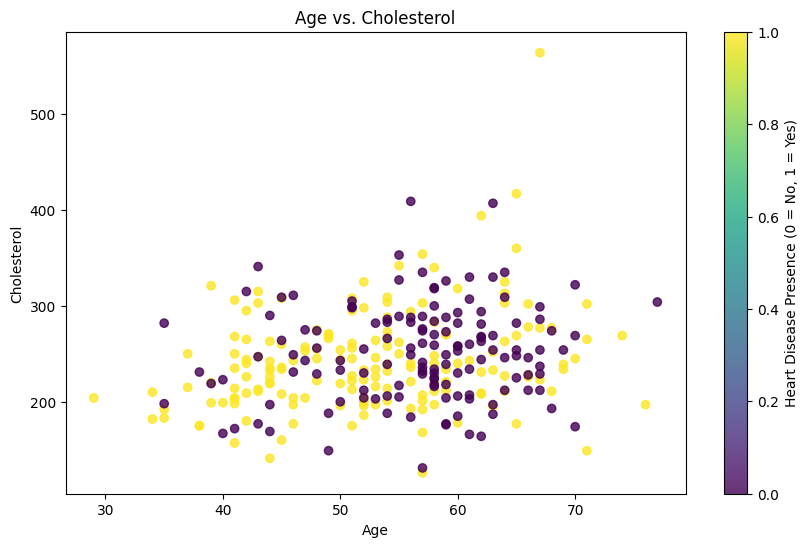

In [46]:
import matplotlib.pyplot as plt

# Scatter plot of Age vs. Cholesterol, colored by the output (presence of heart disease)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['age'], df['chol'], c=df['output'], cmap='viridis', alpha=0.8)
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

cbar = plt.colorbar(scatter)
cbar.set_label('Heart Disease Presence (0 = No, 1 = Yes)')

plt.show()


In [47]:

import plotly.express as px

fig = px.scatter_3d(df, x='age', y='chol', z='oldpeak',
                    color='output', title='Interactive 3D Scatter Plot of Heart Attack Dataset',
                    labels={'age': 'Age', 'chol': 'Cholesterol', 'oldpeak': 'Oldpeak', 'output': 'Heart Disease Presence'})

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [48]:

fig = px.scatter(
    df,
    x='age',
    y='chol',
    title="Cholesterol Levels by Age",
    size='chol',
    color='output',
    hover_name='age',  # Display age on hover
    hover_data=['chol', 'output'],
    size_max=60,
)

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        range=[df['age'].min(), df['age'].max()],
    ),
    xaxis_tickangle=-45
)

fig.update_xaxes(categoryorder='array', categoryarray=sorted(df['age']))

fig.show()


In [49]:
fig = px.scatter(
    df,
    x='sex',
    y='chol',
    title="Cholesterol Levels by Sex",
    size='thalachh',
    color='output',
    hover_name='sex',  #
    hover_data=['chol', 'thalachh', 'output'],  #
    size_max=60,
)

fig.update_layout(
    xaxis=dict(
        tickvals=[0, 1],  # 0 is Female  1 is Male
        ticktext=['Female', 'Male'],
        rangeslider=dict(
            visible=True
        ),
        range=[df['sex'].min(), df['sex'].max()],
    ),
    xaxis_tickangle=-45
)

fig.show()


In [55]:
import plotly.express as px
import pandas as pd

df['age_group'] = pd.cut(df['age'], bins=[29, 39, 49, 59, 69, 79], labels=['30-39', '40-49', '50-59', '60-69', '70-79'])
df_filtered = df.dropna(subset=['age_group'])

#treemap
fig = px.treemap(
    df_filtered,
    path=[px.Constant("Age Groups"), 'age_group'],
    values='chol',
    title="Cholesterol Levels Across Age Groups",
    color='chol',
    color_continuous_scale='Reds',
)
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(
    texttemplate='%{label}<br>%{value:.0f}',
    textposition='middle center',
    hovertemplate='Cholesterol Level: %{value:.0f}',  # Hover show chol level
)

fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1626: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

